In [1]:
# Load the dataset
import pandas as pd
import numpy as np

# Replace 'your_url_here' with the actual URL to the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                'hours-per-week', 'native-country', 'income']

df = pd.read_csv(url, header=None, names=column_names, na_values=' ?', skipinitialspace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
df.isnull().sum(axis =0)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [3]:
# Check statistical values
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# Check the data types and attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [6]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [7]:
df = df.drop(['education','fnlwgt'],axis = 1)
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df.replace('?', np.NaN, inplace = True)
df.head(5)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
# Check the missing values in each column
null_value = print(df.isnull().sum())
# Check the total amount of missing values
null_value = print(df.isnull().sum().sum())

age                  0
workclass         1836
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64
4262


In [10]:
df.fillna(method='ffill',inplace = True)
null_value = print(df.isnull().sum())
# Check the total amount of missing values
null_value = print(df.isnull().sum().sum())

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
0


In [11]:
# Categorical data convert into numerical 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['workclass']= le.fit_transform(df['workclass'])
df['marital-status']= le.fit_transform(df['marital-status'])
df['occupation']= le.fit_transform(df['occupation'])
df['relationship']= le.fit_transform(df['relationship'])
df['race']= le.fit_transform(df['race'])
df['sex']= le.fit_transform(df['sex'])
df['native-country']= le.fit_transform(df['native-country'])
df['income']= le.fit_transform(df['income'])

df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,9,4,0,3,4,1,0,0,20,38,0


In [12]:
df['income'].unique()

array([0, 1])

In [13]:
# Drop the income column from dataset and 
# assign as new data column
x = df.drop(['income'], axis = 1)
y = df['income']
x.head(5)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,13,4,0,1,4,1,2174,0,40,38
1,50,5,13,2,3,0,4,1,0,0,13,38
2,38,3,9,0,5,1,4,1,0,0,40,38
3,53,3,7,2,5,0,2,1,0,0,40,38
4,28,3,13,2,9,5,2,0,0,0,40,4


In [14]:
# Normalize the data
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = Normalizer().fit_transform(x)

In [15]:
# Balance the dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

x_smote, y_smote = smote.fit_resample(x, y)
y_smote.value_counts()

0    24720
1    24720
Name: income, dtype: int64

In [16]:
# split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size = 0.2)

In [17]:
x_train

array([[-0.34734138, -0.02413778, -0.00845074, ..., -0.05838432,
        -0.44604166,  0.0711999 ],
       [ 0.19130677, -0.85357839, -0.00980584, ..., -0.06774641,
        -0.01107829,  0.082617  ],
       [-0.20567017, -0.02628984, -0.12328775, ..., -0.0635897 ,
        -0.0101219 , -0.55169591],
       ...,
       [-0.0485937 , -0.01657668, -0.29353863, ..., -0.04009558,
         0.87774585,  0.04889671],
       [ 0.04860325, -0.01737196,  0.2954573 , ...,  0.8734102 ,
        -0.00687123,  0.05124255],
       [ 0.18593884, -0.0342097 ,  0.78799379, ..., -0.08274622,
        -0.01353115,  0.10090932]])

In [18]:
#Scaled the x_train and x_test
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
x_train_scaled

array([[-1.22391031, -0.06469903, -0.21992054, ..., -0.16851647,
        -1.77309452,  0.14922231],
       [ 0.5200872 , -2.89974901, -0.22419991, ..., -0.20991807,
        -0.20892666,  0.2058105 ],
       [-0.76521714, -0.07205482, -0.58257303, ..., -0.19153602,
        -0.20548739, -2.93812495],
       ...,
       [-0.25664587, -0.03885499, -1.12022118, ..., -0.08763885,
         2.98736589,  0.03867784],
       [ 0.05805166, -0.04157326,  0.73981369, ...,  3.95212334,
        -0.19379766,  0.05030488],
       [ 0.50270727, -0.09912512,  2.29523195, ..., -0.27625115,
        -0.21774736,  0.29647534]])

In [20]:
x_test_scaled

array([[ 0.61529702, -1.64918413,  1.0752356 , ..., -0.16294609,
        -0.20268052,  0.14160866],
       [-1.19913175, -0.07323772, -0.22268253, ..., -0.19523786,
        -0.20697455,  0.18574542],
       [-0.95188326, -0.14927796, -0.24727909, ..., -0.43320192,
        -0.23861802,  0.5109975 ],
       ...,
       [ 0.30239687, -0.13377138, -0.24226321, ..., -0.38467487,
         0.48878749,  0.44467016],
       [ 0.14879205, -0.20781961, -0.26621541, ..., -0.61640503,
        -0.26297961,  0.76140166],
       [-0.06635571, -0.04472719,  0.15686348, ..., -0.1060156 ,
        -0.35063082, -4.59670024]])

In [21]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Naive Bayes

Accuracy Score 0.7577872168284789

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      4905
           1       0.81      0.67      0.74      4983

    accuracy                           0.76      9888
   macro avg       0.77      0.76      0.76      9888
weighted avg       0.77      0.76      0.76      9888


Confusion Metrics:


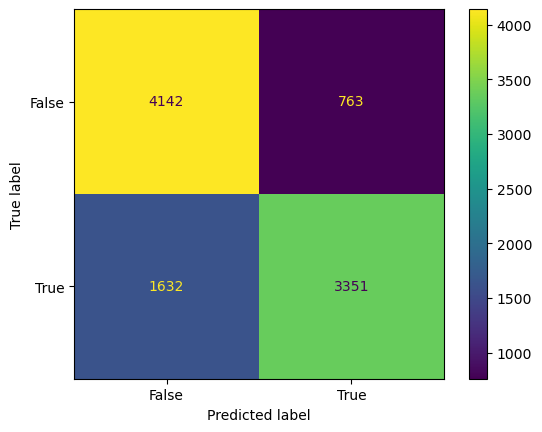

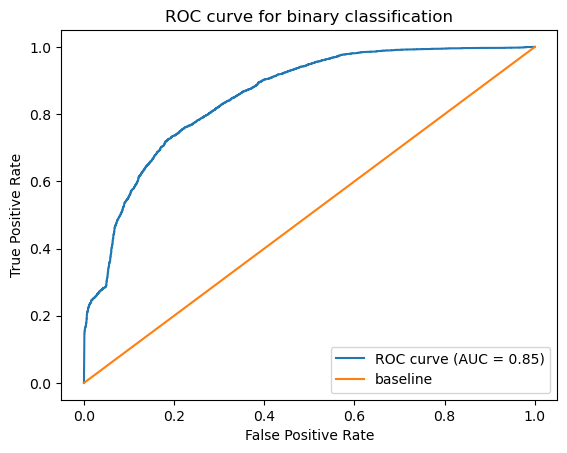

In [22]:
# Fit the model for split dataset
gb = GaussianNB()
gb.fit(x_train_scaled,y_train)

y_pred = gb.predict (x_test_scaled)
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('\nClassification Report') 
print(classification_report(y_test,y_pred))

print('\nConfusion Metrics:')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, 
                                            display_labels = [False,True])
cm_display.plot()
plt.show()


# Predict the probabilities of the positive class
y_pred = gb.predict_proba(x_test_scaled)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

In [23]:
from joblib import dump, load

dump(gb, 'adgb.joblib')
# Load the model using joblib
loaded_model = load('adgb.joblib')

# Make predictions using the loaded model
def predict(input_data):
    # Ensure input_data is a NumPy array
    input_data_np = np.array(input_data)

    # Use the loaded model for predictions
    predictions = loaded_model.predict(input_data_np)

    return predictions

accuracy = loaded_model.score(x_test_scaled, y_test)
print(f"Loaded model accuracy: {accuracy}")

sample = x_test_scaled[0:1]  

# Prediction of the model
ld_pred = predict(sample)

if ld_pred == 1:
    print("A person's income above $50K, Single prediction =", ld_pred)
else:
    print("A person's income below $50K, Single prediction =", ld_pred)


Loaded model accuracy: 0.7577872168284789
A person's income below $50K, Single prediction = [0]


In [24]:
import pickle

# Save model
with open('Ad_incomeknn.pkl', 'wb') as file:
    pickle.dump(gb, file)

# Load model
with open('Ad_incomeknn.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions using the loaded model
loaded_model_pred = loaded_model.predict(x_test_scaled)

# Verify the model by predicting on the test set
accuracy = loaded_model.score(x_test_scaled, y_test)
print(f"Loaded model accuracy: {accuracy}")

# To get a single prediction
sigle_pred = x_test_scaled[0:1] 

# Make a single prediction using the loaded model
sp = loaded_model.predict(sigle_pred)

if sp ==1:
    print("A person's income above $50K, Single prediction =", sp)
else:
    print("A person's income below $50K, Single prediction =", sp)


Loaded model accuracy: 0.7577872168284789
A person's income below $50K, Single prediction = [0]


# KNN

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      4905
           1       0.81      0.91      0.85      4983

    accuracy                           0.84      9888
   macro avg       0.85      0.84      0.84      9888
weighted avg       0.85      0.84      0.84      9888


Confusion Metrics:


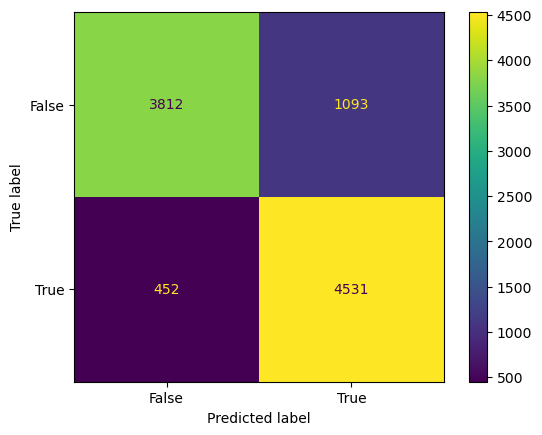

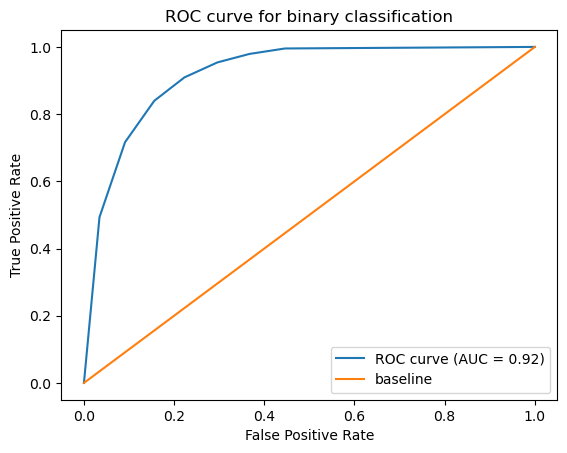

In [25]:
# Fit the model for split dataset
knn_model =KNeighborsClassifier(n_neighbors=7).fit(x_train_scaled,y_train)
y_pred = knn_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report and Confusion Matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Metrics:')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, 
                                            display_labels = [False,True])
cm_display.plot()
plt.show()

# Predict the probabilities of the positive class
y_pred = knn_model.predict_proba(x_test_scaled)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

In [26]:
from joblib import dump, load

dump(knn_model, 'adknn.joblib')
# Load the model using joblib
loaded_model = load('adknn.joblib')

# Make predictions using the loaded model
def predict(input_data):
    # Ensure input_data is a NumPy array
    input_data_np = np.array(input_data)

    # Use the loaded model for predictions
    predictions = loaded_model.predict(input_data_np)

    return predictions

accuracy = loaded_model.score(x_test_scaled, y_test)
print(f"Loaded model accuracy: {accuracy}")

sample = x_test_scaled[0:1]  

# Prediction of the model
ld_pred = predict(sample)

if ld_pred == 1:
    print("A person's income above $50K, Single prediction =", ld_pred)
else:
    print("A person's income below $50K, Single prediction =", ld_pred)

Loaded model accuracy: 0.84375
A person's income above $50K, Single prediction = [1]


In [27]:
import pickle

# Save model
with open('Ad_incomeknn.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

# Load model
with open('Ad_incomeknn.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions using the loaded model
loaded_model_pred = loaded_model.predict(x_test_scaled)

# Verify the model by predicting on the test set
accuracy = loaded_model.score(x_test_scaled, y_test)
print(f"Loaded model accuracy: {accuracy}")

# To get a single prediction
sigle_pred = x_test_scaled[0:1] 

# Make a single prediction using the loaded model
sp = loaded_model.predict(sigle_pred)

if sp ==1:
    print("A person's income above $50K, Single prediction =", sp)
else:
    print("A person's income below $50K, Single prediction =", sp)


Loaded model accuracy: 0.84375
A person's income above $50K, Single prediction = [1]


# Random Forest

Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      4905
           1       0.86      0.89      0.87      4983

    accuracy                           0.87      9888
   macro avg       0.87      0.87      0.87      9888
weighted avg       0.87      0.87      0.87      9888


Confusion Metrics:


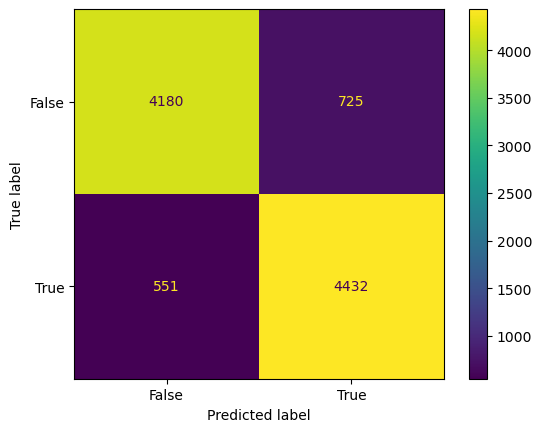

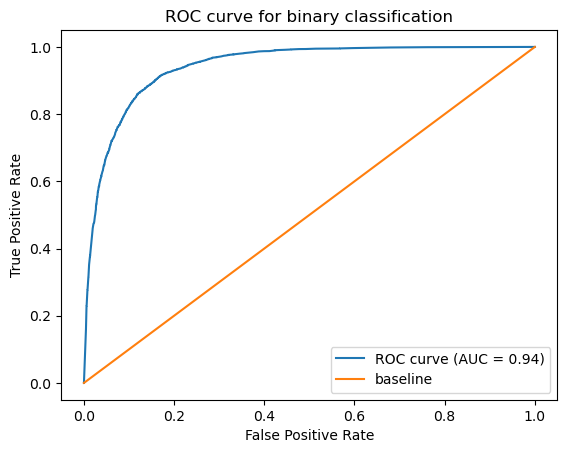

In [29]:
rf = RandomForestClassifier(random_state=42)
# Train the model
rf.fit(x_train_scaled, y_train)
# Make predictions on the test set
y_pred = rf.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
# Classification Report and Confusion Matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Metrics:')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, 
                                            display_labels = [False,True])
cm_display.plot()
plt.show()

# Predict the probabilities of the positive class
y_pred = rf.predict_proba(x_test_scaled)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

In [30]:
from joblib import dump, load

dump(rf, 'adrf.joblib')
# Load the model using joblib
loaded_model = load('adrf.joblib')

# Make predictions using the loaded model
def predict(input_data):
    # Ensure input_data is a NumPy array
    input_data_np = np.array(input_data)

    # Use the loaded model for predictions
    predictions = loaded_model.predict(input_data_np)

    return predictions

accuracy = loaded_model.score(x_test_scaled, y_test)
print(f"Loaded model accuracy: {accuracy}")

sample = x_test_scaled[0:1]  

# Prediction of the model
ld_pred = predict(sample)

if ld_pred == 1:
    print("A person's income above $50K, Single prediction =", ld_pred)
else:
    print("A person's income below $50K, Single prediction =", ld_pred)

Loaded model accuracy: 0.8709546925566343
A person's income above $50K, Single prediction = [1]


In [31]:
import pickle

# Save model
with open('Ad_income.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Load model
with open('Ad_income.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions using the loaded model
loaded_model_pred = loaded_model.predict(x_test_scaled)

# Verify the model by predicting on the test set
accuracy = loaded_model.score(x_test_scaled, y_test)
print(f"Loaded model accuracy: {accuracy}")

# To get a single prediction
sigle_pred = x_test_scaled[0:1] 

# Make a single prediction using the loaded model
sp = loaded_model.predict(sigle_pred)

if sp ==1:
    print("A person's income above $50K, Single prediction =", sp)
else:
    print("A person's income below $50K, Single prediction =", sp)

Loaded model accuracy: 0.8709546925566343
A person's income above $50K, Single prediction = [1]


# Logistic Regression

Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4905
           1       0.77      0.78      0.78      4983

    accuracy                           0.77      9888
   macro avg       0.77      0.77      0.77      9888
weighted avg       0.77      0.77      0.77      9888


Confusion Metrics:


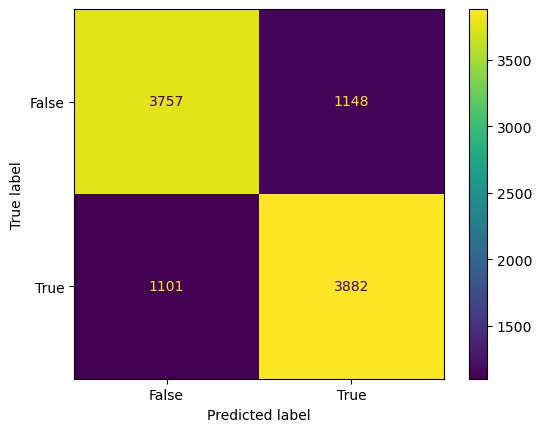

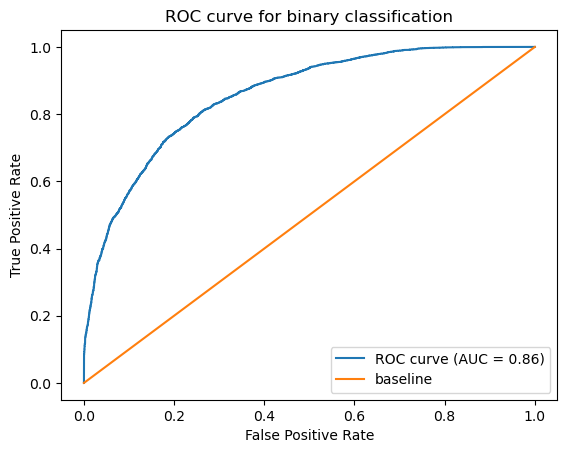

In [33]:
lr = LogisticRegression(random_state=42)

# Train the model
lr.fit(x_train_scaled, y_train)
# Make predictions on the test set
y_pred = lr.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
# Classification Report and Confusion Matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Metrics:')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, 
                                            display_labels = [False,True])
cm_display.plot()
plt.show()

# Predict the probabilities of the positive class
y_pred = lr.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

In [34]:
from joblib import dump, load

dump(lr, 'adlr.joblib')
# Load the model using joblib
loaded_model = load('adlr.joblib')

# Make predictions using the loaded model
def predict(input_data):
    # Ensure input_data is a NumPy array
    input_data_np = np.array(input_data)

    # Use the loaded model for predictions
    predictions = loaded_model.predict(input_data_np)

    return predictions

accuracy = loaded_model.score(x_test_scaled, y_test)
print(f"Loaded model accuracy: {accuracy}")

sample = x_test_scaled[0:1]  

# Prediction of the model
ld_pred = predict(sample)

if ld_pred == 1:
    print("A person's income above $50K, Single prediction =", ld_pred)
else:
    print("A person's income below $50K, Single prediction =", ld_pred)


Loaded model accuracy: 0.7725525889967637
A person's income above $50K, Single prediction = [1]


In [35]:
import pickle

# Save model
with open('Ad_income.pkl', 'wb') as file:
    pickle.dump(lr, file)

# Load model
with open('Ad_income.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions using the loaded model
loaded_model_pred = loaded_model.predict(x_test_scaled)

# Verify the model by predicting on the test set
accuracy = loaded_model.score(x_test_scaled, y_test)
print(f"Loaded model accuracy: {accuracy}")

# To get a single prediction
sigle_pred = x_test_scaled[0:1] 

# Make a single prediction using the loaded model
sp = loaded_model.predict(sigle_pred)

if sp ==1:
    print("A person's income above $50K, Single prediction =", sp)
else:
    print("A person's income below $50K, Single prediction =", sp)


Loaded model accuracy: 0.7725525889967637
A person's income above $50K, Single prediction = [1]


# Make prediction from Tensorflow Keras model

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Convert labels to one-hot encoding for Keras
y_train_one_hot = keras.utils.to_categorical(y_train)
y_test_one_hot = keras.utils.to_categorical(y_test)

# Nerual network model use
md = keras.Sequential([
    keras.layers.Dense(128, activation='relu', 
                       input_shape=(x_train_scaled.shape[1],)),
    keras.layers.Dense(2, activation='softmax') 
])

md.compile(optimizer='adam', loss='categorical_crossentropy', 
           metrics=['accuracy'])

# Keras model training step
md.fit(x_train_scaled, y_train_one_hot, epochs=10, batch_size=32, 
       validation_split=0.2)

# Model evaluation step
y_pred_keras = np.argmax(md.predict(x_test_scaled), axis=1)

# Save Keras model
md.save('km.h5')

# Load Keras model
loaded_mk = keras.models.load_model('km.h5')

# Make predictions using the loaded Keras model
def predict(input_data, loaded_model):
    return np.argmax(loaded_model.predict(input_data), axis=1)

# Example usage:
sample_in = x_test_scaled[0:1]
keras_predictions = predict(sample_in, loaded_mk)

if keras_predictions ==1:
    print("A person's income above $50K, Single prediction ="
          ,keras_predictions)
else:
    print("A person's income below $50K, Single prediction ="
          ,keras_predictions)
    
# Accuracy of model
accuracy_keras = accuracy_score(y_test, y_pred_keras)
print(f"Accuracy on test set (Keras): {accuracy_keras:.4f}")

Epoch 1/10
989/989 [==============================] - 4s 3ms/step - loss: 0.4160 - accuracy: 0.8021 - val_loss: 0.3924 - val_accuracy: 0.8176
Epoch 2/10
989/989 [==============================] - 3s 3ms/step - loss: 0.3879 - accuracy: 0.8203 - val_loss: 0.3856 - val_accuracy: 0.8201
Epoch 3/10
989/989 [==============================] - 3s 3ms/step - loss: 0.3820 - accuracy: 0.8236 - val_loss: 0.3825 - val_accuracy: 0.8204
Epoch 4/10
989/989 [==============================] - 3s 3ms/step - loss: 0.3775 - accuracy: 0.8258 - val_loss: 0.3842 - val_accuracy: 0.8204
Epoch 5/10
989/989 [==============================] - 3s 3ms/step - loss: 0.3742 - accuracy: 0.8273 - val_loss: 0.3824 - val_accuracy: 0.8190
Epoch 6/10
989/989 [==============================] - 3s 3ms/step - loss: 0.3706 - accuracy: 0.8288 - val_loss: 0.3756 - val_accuracy: 0.8221
Epoch 7/10
989/989 [==============================] - 3s 3ms/step - loss: 0.3679 - accuracy: 0.8294 - val_loss: 0.3744 - val_accuracy: 0.8232
Epoch 